In [1]:
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
import seaborn as sns

In [2]:
base_dir = 'Dataset_BUSI_with_GT'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

#Normalization
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

#Train,Val and Test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 2112 images belonging to 2 classes.
Found 452 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [3]:
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

In [4]:
#Final layers set
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
output_layer = Dense(1, activation='sigmoid')(x)

In [5]:
model = Model(inputs=base_model.input, outputs=output_layer)

In [6]:
#Freeze early layers
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


66/66 [==============================] - 1337s 20s/step - loss: 0.4762 - accuracy: 0.7812 - val_loss: 0.4097 - val_accuracy: 0.7920
Epoch 2/10
66/66 [==============================] - 1386s 21s/step - loss: 0.2819 - accuracy: 0.8778 - val_loss: 0.3023 - val_accuracy: 0.8761
Epoch 3/10
66/66 [==============================] - 1418s 22s/step - loss: 0.1990 - accuracy: 0.9190 - val_loss: 0.2689 - val_accuracy: 0.8872
Epoch 4/10
66/66 [==============================] - 1434s 22s/step - loss: 0.1458 - accuracy: 0.9432 - val_loss: 0.2610 - val_accuracy: 0.8872
Epoch 5/10
66/66 [==============================] - 1406s 21s/step - loss: 0.1149 - accuracy: 0.9602 - val_loss: 0.2767 - val_accuracy: 0.8739
Epoch 6/10
66/66 [==============================] - 1381s 21s/step - loss: 0.0785 - accuracy: 0.9777 - val_loss: 0.2508 - val_accuracy: 0.8960
Epoch 7/10
66/66 [==============================] - 1378s 21s/step - loss: 0.0599 - accuracy: 0.9844 - val_loss: 0.3357 - val_accuracy: 0.89

In [8]:
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')

15/15 [==============================] - 245s 16s/step - loss: 0.2453 - accuracy: 0.9363
Test accuracy: 0.9362637400627136


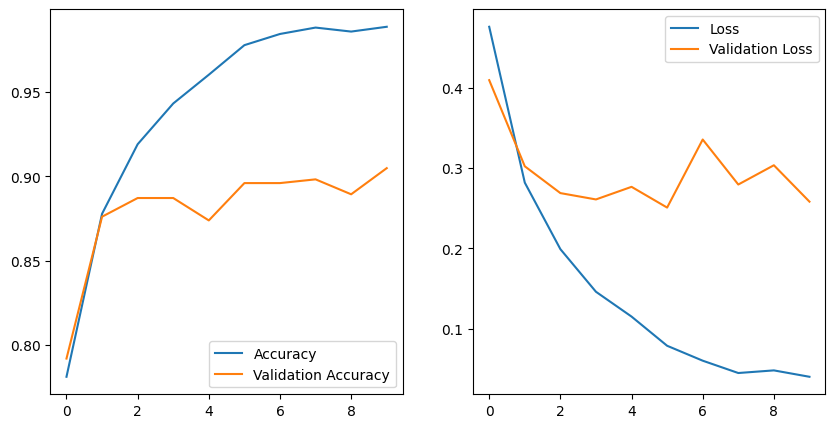

In [9]:
#Accuracy,Val accuracy, loss and val loss graphs
acc = history.history['accuracy']
val_acc =  history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Accuracy')
plt.plot(epochs_range,val_acc,label="Validation Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Loss')
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.show()

In [10]:
predictions = model.predict(test_generator)

15/15 [==============================] - 255s 16s/step


In [11]:
binary_predictions = (predictions > 0.5).astype(int).flatten()

true_labels = test_generator.classes

print("Predictions for test data (Predicted, True Label):")
for i in range(len(true_labels)):
    print(f"{binary_predictions[i]}, {true_labels[i]}")

Predictions for test data (Predicted, True Label):
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
1, 0
0, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
1, 0
0, 0
1, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0
0, 0

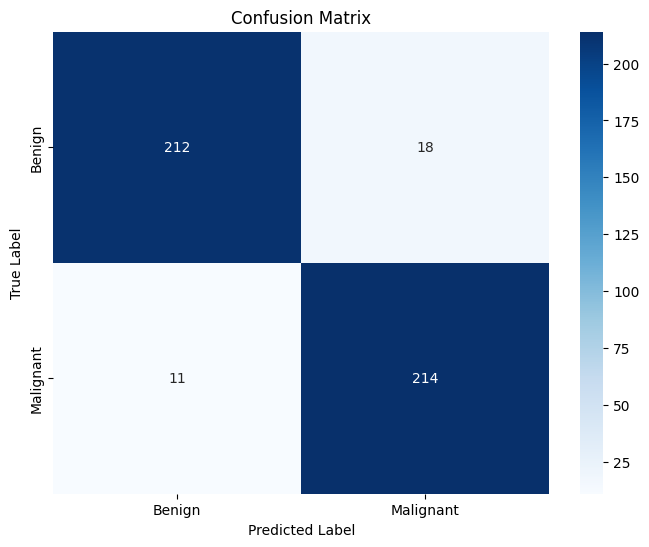

In [12]:
#Confussion matrix
cm = confusion_matrix(true_labels, binary_predictions)

#Confusion matrix plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

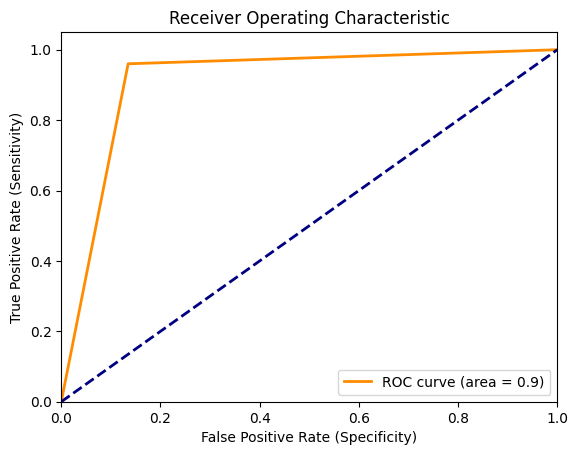

In [14]:
#ROC Curve (AUC)
fpr, tpr, _ = roc_curve(test_generator.classes, binary_predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.1f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [13]:
model.save('nasnet')

INFO:tensorflow:Assets written to: nasnet\assets


INFO:tensorflow:Assets written to: nasnet\assets


In [3]:
from keras.preprocessing import image
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(331, 331))  # Adjust target size as needed
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values
    return img_array

def predict_single_image(model, image_path):
    processed_image = preprocess_image(image_path)
    prediction = model.predict(processed_image)
    return prediction

In [2]:
model = tf.keras.models.load_model('nasnet')

In [4]:
image_path = './Dataset_BUSI_with_GT/malignant/a.png'  # Replace with the actual image filename
prediction = predict_single_image(model, image_path)
prediction

1/1 [==============================] - 7s 7s/step


array([[0.3116026]], dtype=float32)